In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import time
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("all-states-history.csv")
si = pd.read_csv("OxCGRT_US_latest.csv").drop(['CountryName','CountryCode'], axis=1)
df

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-05,AK,A,279.0,NaN,0,NaN,1219.0,1219.0,44.0,...,1536911.0,7345,NaN,NaN,NaN,NaN,NaN,0,1536911.0,7345
1,2021-02-05,AL,A,8449.0,6697.0,84,1752.0,43005.0,43005.0,1671.0,...,2149684.0,0,NaN,NaN,140376.0,NaN,2149684.0,0,NaN,0
2,2021-02-05,AR,A+,5050.0,4032.0,41,1018.0,13902.0,13902.0,808.0,...,2508232.0,11719,NaN,NaN,NaN,385223.0,NaN,0,2508232.0,11719
3,2021-02-05,AS,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-02-05,AZ,A+,13948.0,12399.0,196,1549.0,54309.0,54309.0,3167.0,...,6889120.0,47208,421679.0,NaN,NaN,NaN,3519585.0,15705,6889120.0,47208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19088,2020-01-17,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
19089,2020-01-16,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
19090,2020-01-15,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
19091,2020-01-14,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
#si

In [4]:
si = si[~si['RegionName'].isna()].drop(['RegionCode', 'Jurisdiction'], axis=1)

In [5]:
#si

In [6]:
#si.columns

In [7]:
relcols = ['RegionName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'StringencyIndex', 'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex',
       'EconomicSupportIndexForDisplay']
si = si[relcols]

In [8]:
si

,RegionName,Date,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
403,Alaska,20200101,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
404,Alaska,20200102,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
405,Alaska,20200103,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
406,Alaska,20200104,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
407,Alaska,20200105,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,Wyoming,20210202,52128.0,624.0,NaN,49.07,NaN,52.38,NaN,50.11,NaN,57.82,NaN,0.0
20952,Wyoming,20210203,52288.0,624.0,NaN,49.07,NaN,52.38,NaN,50.11,NaN,57.82,NaN,0.0
20953,Wyoming,20210204,52468.0,624.0,NaN,49.07,NaN,52.38,NaN,50.11,NaN,57.82,NaN,0.0
20954,Wyoming,20210205,52576.0,624.0,NaN,49.07,NaN,52.38,NaN,50.11,NaN,57.82,NaN,0.0


In [9]:
si['Date'] = pd.to_datetime(si['Date'], format='%Y%m%d')

In [10]:
si.columns

Index(['RegionName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'StringencyIndex', 'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex',
       'EconomicSupportIndexForDisplay'],
      dtype='object')

In [11]:
si['RegionName'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

In [12]:
party_map = {'Alaska' : 'red','Alabama' : 'red','Arkansas' : 'red','Arizona' : 'red', 
             'California' : 'blue','Colorado' : 'blue','Connecticut' : 'blue', 
             'Washington DC' : 'blue','Delaware' : 'blue','Florida' : 'red',
             'Georgia' : 'red', 'Hawaii' : 'blue', 'Iowa' : 'red', 
             'Idaho' : 'red','Illinois' : 'blue', 'Indiana' : 'red',
             'Kansas' : 'blue', 'Kentucky' : 'blue', 'Louisiana' : 'blue', 
             'Massachusetts' : 'red', 'Maryland' : 'red','Maine' : 'blue', 
             'Michigan' : 'blue', 'Minnesota' : 'blue', 'Missouri' : 'red', 
             'Mississippi' : 'red','Montana' : 'red', 'North Carolina' : 'blue', 
             'North Dakota' : 'red', 'Nebraska' : 'red','New Hampshire' : 'red', 
             'New Jersey' : 'blue', 'New Mexico' : 'blue', 'Nevada' : 'blue', 
             'New York' : 'blue','Ohio' : 'red', 'Oklahoma' : 'red', 
             'Oregon' : 'blue','Pennsylvania' : 'blue', 
             'Rhode Island' : 'blue','South Carolina' : 'red', 'South Dakota' : 'red', 
             'Tennessee' : 'red', 'Texas' : 'red', 'Utah' : 'red',
             'Virginia' : 'blue','Vermont' : 'red', 'Washington' : 'blue', 
             'Wisconsin' : 'blue', 'West Virginia' : 'red', 'Wyoming' : 'red'}

#change to tableau scheme to dampen colors
for k,v in party_map.items():
    if v == 'red':
        party_map[k] = 'tab:red'
    elif v == 'blue':
        party_map[k] = 'tab:blue'

In [13]:
#add political party to si data
si['party'] = si['RegionName'].map(party_map)

In [14]:
#create color map
col = []
for name in si.groupby('RegionName')['StringencyIndexForDisplay'].mean().sort_values().index:
    col.append(party_map[name])

Text(0, 0.5, 'Stringency Index')

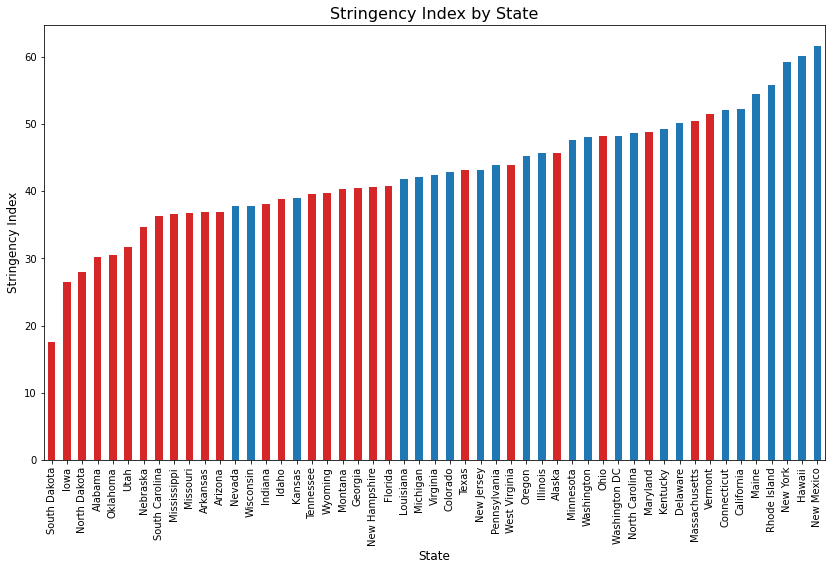

In [15]:
ax = si.groupby('RegionName')['StringencyIndexForDisplay'].mean().sort_values().plot(kind='bar', 
                                                                                     figsize=(14,8), 
                                                                                     color = col)


ax.set_title('Stringency Index by State', fontsize=16)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Stringency Index", fontsize=12)

In [16]:
df = df.sort_values('date')

In [17]:
party_map2 = {'AK' : 'red','AL' : 'red','AR' : 'red','AZ' : 'red', 
             'CA' : 'blue','CO' : 'blue','CT' : 'blue', 
             'DC' : 'blue','DE' : 'blue','FL' : 'red',
             'GA' : 'red', 'HI' : 'blue', 'IA' : 'red', 
             'ID' : 'red','IL' : 'blue', 'IN' : 'red',
             'KS' : 'blue', 'KY' : 'blue', 'LA' : 'blue', 
             'MA' : 'red', 'MD' : 'red','ME' : 'blue', 
             'MI' : 'blue', 'MN' : 'blue', 'MO' : 'red', 
             'MS' : 'red','MT' : 'red', 'NC' : 'blue', 
             'ND' : 'red', 'NE' : 'red','NH' : 'red', 
             'NJ' : 'blue', 'NM' : 'blue', 'NV' : 'blue', 
             'NY' : 'blue','OH' : 'red', 'OK' : 'red', 
             'OR' : 'blue','PA' : 'blue', 
             'RI' : 'blue','SC' : 'red', 'SD' : 'red', 
             'TN' : 'red', 'TX' : 'red', 'UT' : 'red',
             'VA' : 'blue','VT' : 'red', 'WA' : 'blue', 
             'WI' : 'blue', 'WV' : 'red', 'WY' : 'red'}

for k,v in party_map2.items():
    if v == 'red':
        party_map2[k] = 'tab:red'
    elif v == 'blue':
        party_map2[k] = 'tab:blue'
        
df['party'] = df['state'].map(party_map2)

In [18]:
df = df.dropna(subset=['party'])

In [19]:
df.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [20]:
dem = pd.read_csv('states_demographics.txt', header = 1)
relcols = ['Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population']
dem = dem[relcols]
dem = dem.rename(columns={'Estimate!!SEX AND AGE!!Total population':'population'})

In [21]:
statecode_map = {'Alaska' : 'AK','Alabama' : 'AL','Arkansas' : 'AK','Arizona' : 'AZ', 
             'California' : 'CA','Colorado' : 'CO','Connecticut' : 'CT', 
             'Washington DC' : 'DC','Delaware' : 'DE','Florida' : 'FL',
             'Georgia' : 'GA', 'Hawaii' : 'HI', 'Iowa' : 'IA', 
             'Idaho' : 'ID','Illinois' : 'IL', 'Indiana' : 'IN',
             'Kansas' : 'KA', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 
             'Massachusetts' : 'MA', 'Maryland' : 'MD','Maine' : 'ME', 
             'Michigan' : 'MI', 'Minnesota' : 'MN', 'Missouri' : 'MO', 
             'Mississippi' : 'MI','Montana' : 'MT', 'North Carolina' : 'NC', 
             'North Dakota' : 'ND', 'Nebraska' : 'NE','New Hampshire' : 'NH', 
             'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'Nevada' : 'NV', 
             'New York' : 'NY','Ohio' : 'OH', 'Oklahoma' : 'OK', 
             'Oregon' : 'OR','Pennsylvania' : 'PA', 
             'Rhode Island' : 'RI','South Carolina' : 'SC', 'South Dakota' : 'SD', 
             'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT',
             'Virginia' : 'VA','Vermont' : 'VT', 'Washington' : 'WA', 
             'Wisconsin' : 'WI', 'West Virginia' : 'WV', 'Wyoming' : 'WY'}

In [22]:
dem['code'] = dem['Geographic Area Name'].map(statecode_map)
dem = dem.dropna()

In [23]:
df2 = pd.merge(df, dem, left_on='state', right_on='code').drop(columns=['Geographic Area Name', 'code'])
df2 = df2.dropna(subset=['death'])

In [24]:
df2['death_per_cap'] = ( df2['death'] / df2['population'] ) * 100

In [25]:
df2

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,party,population,death_per_cap
44,2020-02-26,WA,NaN,2.0,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,0,tab:blue,7614893,0.000026
45,2020-02-27,WA,NaN,2.0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,0,tab:blue,7614893,0.000026
46,2020-02-28,WA,NaN,4.0,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,0,tab:blue,7614893,0.000053
47,2020-02-29,WA,NaN,5.0,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,41.0,41,NaN,0,tab:blue,7614893,0.000066
48,2020-03-01,WA,NaN,8.0,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,114.0,73,NaN,0,tab:blue,7614893,0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16784,2021-02-01,OK,A+,3564.0,NaN,17,NaN,21957.0,21957.0,1184.0,...,NaN,NaN,NaN,NaN,0,3166000.0,0,tab:red,3956971,0.090069
16785,2021-02-02,OK,A+,3602.0,NaN,38,NaN,21996.0,21996.0,1123.0,...,NaN,NaN,NaN,NaN,0,3195609.0,29609,tab:red,3956971,0.091029
16786,2021-02-03,OK,A+,3654.0,NaN,52,NaN,22167.0,22167.0,1048.0,...,NaN,NaN,NaN,NaN,0,3213657.0,18048,tab:red,3956971,0.092343
16787,2021-02-04,OK,A+,3681.0,NaN,27,NaN,22317.0,22317.0,1008.0,...,NaN,NaN,NaN,NaN,0,3230563.0,16906,tab:red,3956971,0.093026


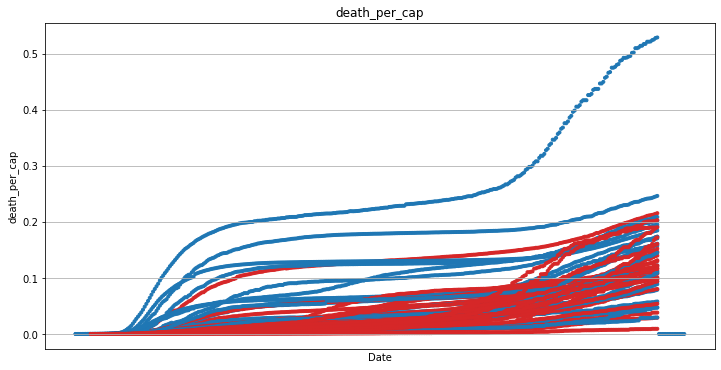

In [26]:
var = 'death_per_cap'
fig, ax = plt.subplots(figsize=(12,6))
ax.grid()
ax.scatter(df2['date'],df2[var], c = df2['party'], marker = '.')
ax.set(xlabel='Date',ylabel=var,title=var)
date_form = DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
plt.show()

In [27]:
df2[df2['date'] > '2021-02-03'][['state','death_per_cap']].sort_values('death_per_cap')

,state,death_per_cap
12418,AK,0.009245
12416,AK,0.009245
5313,VT,0.029007
5312,VT,0.029007
6331,HI,0.029381
...,...,...
770,MA,0.215582
1881,NJ,0.245356
1882,NJ,0.246403
3266,MI,0.528367


In [28]:
df2.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [29]:
relcols = ['date', 'state', 'deathIncrease', 'positiveIncrease', 'party', 'population', 'death_per_cap']
df2 = df2[relcols]

In [30]:
df2.head()

,date,state,deathIncrease,positiveIncrease,party,population,death_per_cap
44,2020-02-26,WA,2,2,tab:blue,7614893,0.000026
45,2020-02-27,WA,0,1,tab:blue,7614893,0.000026
46,2020-02-28,WA,2,2,tab:blue,7614893,0.000053
47,2020-02-29,WA,1,3,tab:blue,7614893,0.000066
48,2020-03-01,WA,3,8,tab:blue,7614893,0.000105


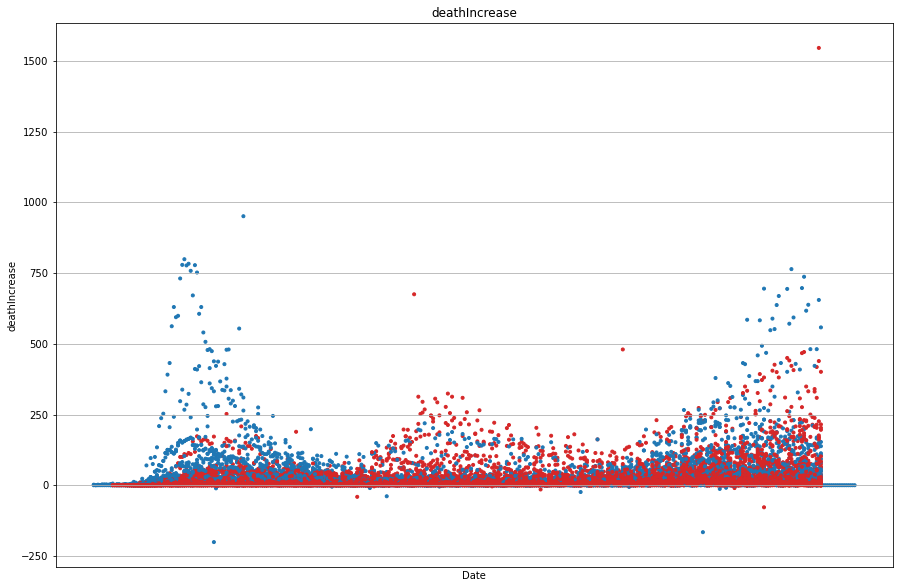

In [31]:
var = 'deathIncrease'
fig, ax = plt.subplots(figsize=(15,10))
ax.grid()
ax.scatter(df2['date'],df2[var], c = df2['party'], marker = '.')
ax.set(xlabel='Date',ylabel=var,title=var)
date_form = DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
plt.show()

In [32]:
relcols = ['date', 'state', 'deathIncrease', 'positiveIncrease']
df2 = df2[relcols]

In [33]:
df2

,date,state,deathIncrease,positiveIncrease
44,2020-02-26,WA,2,2
45,2020-02-27,WA,0,1
46,2020-02-28,WA,2,2
47,2020-02-29,WA,1,3
48,2020-03-01,WA,3,8
...,...,...,...,...
16784,2021-02-01,OK,17,1396
16785,2021-02-02,OK,38,1296
16786,2021-02-03,OK,52,2119
16787,2021-02-04,OK,27,2782


In [43]:
# adapted from a notebook on kaggle
# https://www.kaggle.com/malekzadeh/simple-curve-fitting

def plot_and_predict(more_days, state):    
    def avg_err(pcov):
        return np.round(np.sqrt(np.diag(pcov)).mean(), 2)
    
    cmd = df2[df2['state'] == state].copy() 
    cmd_grp = cmd.groupby('date')[['positiveIncrease', 'deathIncrease']].sum().reset_index()
    y = cmd_grp['positiveIncrease']
    x = np.arange(len(y))

    def f_poly(x, a, b, c, d, e):
        return a * x**4 + b*x**3 + c*x**2 + d*x**1 + e

    def f_pow(x, a, b, c):
        return b*(x)**a + c
        
    def f_exp(x, a, b, c):
        return a * np.exp(-b * x) + c
    
    def f_sigmoid(x, a, b, c, d):
        return c / (1 + np.exp(-b*(x-a)))+d

    popt_poly, pcov_poly = curve_fit(f_poly, x, y)
    popt_pow, pcov_pow = curve_fit(f_pow, x, y, maxfev=100000)
    popt_exp, pcov_exp = curve_fit(f_exp, x, y, p0=(1, 1e-6, 1), maxfev=100000)
    popt_sig, pcov_sig = curve_fit(f_sigmoid,x, y, method='dogbox', 
                                   bounds=([10., 0.001, y.mean(), 10],[100, 1., 10*y.mean(), 100]), 
                                   maxfev=200000)

#    plt.figure(figsize=(18,12))
    x_m = np.arange(len(y)+more_days)
    
    y_m = f_poly(x_m, *popt_poly)    
#    plt.plot(x_m, y_m, c='m', marker="+", label = "Polynomial | error: "+str(avg_err(pcov_poly))) 
#    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 10)
    pred_poly = y_m[-more_days:]
    
    y_m = f_exp(x_m, *popt_exp)
#    plt.plot(x_m, y_m, c='r', marker="p", label = "Exponential | error: "+str(avg_err(pcov_exp))) 
#    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 15, color="r")
    pred_exp = y_m[-more_days:]

    y_m = f_pow(x_m, *popt_pow)
#    plt.plot(x_m, y_m, c='y', marker="s", label = "Power | error: "+str(avg_err(pcov_pow))) 
#    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 15, color="y")
    pred_pow = y_m[-more_days:]

    # sigmoid curve should be the best, but the bounds need to be chosen correctly
    # https://www.youtube.com/watch?v=Kas0tIxDvrg&feature=youtu.be
    y_m = f_sigmoid(x_m, *popt_sig)
#    plt.plot(x_m, y_m, c='g', marker="x", label="Sigmoid | error: "+str(avg_err(pcov_sig))) 
#    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 15, color="g")
    pred_sig = y_m[-more_days:]
    
    poly = pd.DataFrame(pred_poly)
    exp = pd.DataFrame(pred_exp)
    power = pd.DataFrame(pred_pow)
    sigmoid = pd.DataFrame(pred_sig)
    
    print(type(pred_sig))
    print(sigmoid.shape)
    print(sigmoid)
    
    
#     print('Predictions')
#     print('-----------------')
#     print(len(pred_poly), 'Polynomial:', pred_poly)
#     print('-----------------')
#     print(len(pred_exp), 'Exponential:', pred_exp)
#     print('-----------------')
#     print(len(pred_pow), 'Power:', pred_pow)
#     print('-----------------')
#     print(len(pred_sig), 'Sigmoid:', pred_sig)
#     print()
    
#     y = y.values
#     plt.plot(x, y, c='b', marker="o", label = "Official Data")
#     plt.text(x[-1]-2.5, y[-1], str(int(y[-1])), size = 15, color="b")

#     plt.grid(True)
#     plt.xlabel("Days", size=14)
#     plt.xticks(np.arange(1,len(x_m),7),size=10)
#     plt.ylabel("Total Cases", size=14)
#     plt.yticks(size=14)
#     plt.legend(prop={'size': 15})
#     plt.title(state + "'s Data", size=15)
#     plt.axvline(x[-1], color="b")
#     plt.text(x[-1], 1, "today", color="b", size = 20, rotation=90)
#     plt.axvline(x[-1]+30, color="k")
#     plt.text(x[-1]+30, 1000, "next month", color="k", size = 20, rotation=90)

#     plt.show()

In [44]:
start = time.time()
next_days = 35
state = 'NC'
plot_and_predict(next_days, state)
end = time.time()
print(end - start)

<class 'numpy.ndarray'>
(35, 1)
              0
0   2413.755852
1   2413.865473
2   2413.972050
3   2414.075667
4   2414.176406
5   2414.274347
6   2414.369567
7   2414.462142
8   2414.552145
9   2414.639647
10  2414.724718
11  2414.807425
12  2414.887833
13  2414.966006
14  2415.042007
15  2415.115895
16  2415.187729
17  2415.257567
18  2415.325462
19  2415.391470
20  2415.455643
21  2415.518032
22  2415.578685
23  2415.637652
24  2415.694979
25  2415.750712
26  2415.804894
27  2415.857570
28  2415.908780
29  2415.958566
30  2416.006967
31  2416.054022
32  2416.099767
33  2416.144240
34  2416.187476
0.08501982688903809


In [40]:
sigmoid

NameError: name 'sigmoid' is not defined